# Защита персональных данных клиентов

Требуется защитить данные клиентов страховой компании «Хоть потоп» - разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. А также обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [ ]:
def data_describe(data):
    print('Общая информация:')
    data.info()
    print('Первые 5 строк:')
    display(data.head())
    print('Описание датафрейма:')
    display(data.describe())
    print('Пропуски:')
    display(data.isnull().sum().sort_values(ascending=False))
    print('Дубликаты:')
    display(data.duplicated().sum())
    print('Уникальные значения:')
    display(data.nunique().sort_values())
    print('Разделим признаки на категориальные и числовые:')
    num_columns = []
    cat_columns = []
    for num, i in enumerate(data.columns):
        if pd.api.types.is_numeric_dtype(data[i]):
            num_columns.append(i)
        elif pd.api.types.is_object_dtype(data[i]):
            cat_columns.append(i)
    print('Всего числовых признаков:', len(num_columns))
    print('Всего категориальных признаков:', len(cat_columns))

In [ ]:
data_describe(df)

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
Первые 5 строк:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Описание датафрейма:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Пропуски:


Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Дубликаты:


153

Уникальные значения:


Пол                    2
Страховые выплаты      6
Члены семьи            7
Возраст               46
Зарплата             524
dtype: int64

Разделим признаки на категориальные и числовые:
Всего числовых признаков: 5
Всего категориальных признаков: 0


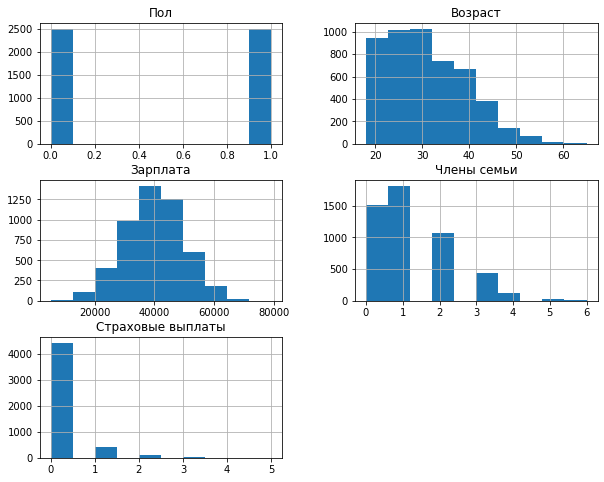

In [ ]:
df.hist(figsize=(10,8));

**Выводы:**
- исходный датафрейм содержит 5 стобцов (4 признака и таргет - количество страховых выплат) и 5000 записей
- пропуски отсутствуют
- имеется 153 явных дубликата
- все признаки числовые
- признаки 'Возраст' и 'Зарплата' имеют тип данных float64
- выбросы отсутствуют
- пол распределён 50/50
- признак зарплаты имеет нормальное распределение
- большинство клиентов не оформляли страховые выплаты

## Предобработка данных

Столбцы 'Возраст' и 'Зарплата' переведем в формат int

In [ ]:
df['Возраст'] = df['Возраст'].astype('int')
df['Зарплата'] = df['Зарплата'].astype('int')
df.dtypes

Пол                  int64
Возраст              int64
Зарплата             int64
Члены семьи          int64
Страховые выплаты    int64
dtype: object

Избавимся от дубликатов

In [ ]:
df.drop_duplicates(inplace=True)

**Выводы:**
- данные подготовлены для исследования: удалены явные дубликаты, изменены типы данных

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Признаки умножают на обратимую матрицу.

Изменится ли качество линейной регрессии? (Её можно обучить заново.) <br>
 a. Изменится. Приведите примеры матриц. <br>
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Ответ на вопрос, изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу, связан с тем, как изменяется матрица признаков после умножения её на обратимую. Если умножение на обратимую матрицу не меняет количество признаков и сохраняет линейную независимость между признаками, то качество линейной регрессии не изменится.

- $X$ — матрица признаков

- $O$ — обратимая матрица


Задача обучения с признаками умноженными на обратимую матрицу:

$$
w = ((XO)^T XO)^{-1} (XO)^T y
$$

$$
w = O^{-1}(O^TX^T X)^{-1} O^TX^T y
$$

$$
w = O^{-1}(O^T)^{-1} (X^T X)^{-1} O^TX^T y
$$

Результатом перемножения $(O^T)^{-1} O^T$ будет единичная матрица, сократим формулу:

$$
w = O^{-1}(X^T X)^{-1} X^T y
$$

$(X^T X)^{-1} X^T y$ - это наша $w$, соответственно:

$$
w = O^{-1}w
$$

Наше предсказание: $a = Xw$, подставим туда равенство с матрицей перемноженой на обратимую:

$$a = XOO^{-1}w$$

Сокращаем единичную матрицу:

$$
a = Xw
$$

**Вывод:**
- при умножении признаков на обратимую матрицу качество линейной регрессии не меняется
- для защиты данных клиентов важно обращать внимание на то, какая матрица будет использоваться для умножения на неё признаков - матрица должна быть обратимой

## Алгоритм преобразования

**Алгоритм**

- данные поделим на признаки и таргет
- создадим обратимую матрицу О
- выполним проверку на обратимость матрицы
- зашифруем признаки, умножив их на обратимую матрицу
- поделим изначальные даные и зашифрованную матрицу на тестовую и тренировочную выборку
- сравним метрики R2

Почему данный алгоритм сработает?

Предсказания равны, при умножении матрицы признаков на обратимую матрицу метрики качества не изменятся.

Если мы можем найти обратимую матрицу, которая сохраняет линейную независимость между признаками и не меняет их количество, то и качество линейной регрессии не изменится.

Если же матрица необратима, то мы можем потерять линейную независимость между признаками и их количеством и это допускает риск изменения качества линейной регрессии. Например, если мы умножим матрицу на вырожденную матрицу, то один из столбцов матрицы может быть линейной комбинацией других столбцов, что приведет к потере информации и снижению качества линейной регрессии.

Имея матрицу признаков $X$, мы можем умножить её на обратимую матрицу $O$ и получить новую матрицу признаков. Затем мы можем обучить новую модель линейной регрессии на этих преобразованных признаках и сравнить её качество с исходной моделью. Это и сделаем:

## Проверка алгоритма

Создадим функцию, которая будет создавать матрицу и зашифровывать признаки, умножая их на обратимую матрицу

In [ ]:
def reversible_matrix(features):
    # создаём случайную матрицу размером равным количеству признаков
    matrix = np.random.randint(100, size=(features.shape[1], features.shape[1]))
    # выполняем проверку на обратимость матрицы
    if np.linalg.det(matrix) != 0:
        # если матрица обратима, находим обратную
        inverse_matrix = np.linalg.inv(matrix)
        return matrix, features @ matrix
        print('Матрица не обратима')

Создадим функцию, которая будет делить данные на выборки, обучать модель линейной регрессии и возвращать значение метрики R2

In [ ]:
def lr_r2(features, target):
    # делим данные на выборки
    features_train, features_test, target_train, target_test = train_test_split(features,
                                                                                target,
                                                                                test_size=0.25,
                                                                                random_state=12345)
    # проверим размеры выборок
    print('features_train size:', features_train.shape)
    print('target_train size:', target_train.shape)
    print('features_test size:', features_test.shape)
    print('target_test size:', target_test.shape)
    # обучим модель линейной регрессии
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    # просчитаем значение метрики r2
    r2 = r2_score(target_test, predictions)
    print('R2:', r2)
    return r2

Данные разобьём на признаки и таргет

In [ ]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

Используя ранее созданную функцию reversible_matrix получим обратимую матрицу и зашифрованые признаки. И просчитаем значение метрики R2 используя функцию lr_r2

In [ ]:
o, features_o = reversible_matrix(features)

In [ ]:
df_r2 = lr_r2(features, target)

features_train size: (3635, 4)
target_train size: (3635,)
features_test size: (1212, 4)
target_test size: (1212,)
R2: 0.42307727615837565


Найдём значение метрики R2 на зашифрованных данных

In [ ]:
o_r2 = lr_r2(features_o, target)

features_train size: (3635, 4)
target_train size: (3635,)
features_test size: (1212, 4)
target_test size: (1212,)
R2: 0.4230772761583076


Мы можем наблюдать, что метрика R2 исходных и зашифрованных данных равна.

Зашифрованную матрицу умножим на обратную и сравним с исходными данным

In [ ]:
features_return = features_o @ np.linalg.inv(o)
features_return.head(5)

,0,1,2,3
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-1.714278e-12,46.0,38000.0,1.000000e+00
2,1.639765e-13,29.0,21000.0,2.464201e-12
3,-1.017278e-11,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,1.383059e-12


In [ ]:
features.head(5)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


Данные совпадают

Проверим равенство исходных и зашифрованных данных после преобразования обратно в исходные

In [ ]:
if np.allclose(features, features_return):
    print('Матрицы равны')
else:
    print('Матрицы различны')

Матрицы равны


**Выводы:**
- исходный датафрейм содержит 5 стобцов (4 признака и таргет - количество страховых выплат) и 5000 записей
- пропуски отсутствовали
- данные подготовлены для исследования: удалены явные дубликаты, изменены типы данных
- данные были зашифрованы путем умножения матрицы признаков на обратимую матрицу
- качество предсказаний линейной регрессии при преобразовании данных не изменилось
- метрика R2 составила 0.435 и на исходных данных, и на зашифрованных
- защифрованные данные можно возвратить в исходное состояние, умножив их на обратную матрицу